In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from multi_scale_edge_detection.MultiScaleContourDetector import multi_scale_contour_detection_with_inhibition

In [22]:
def hog_distance(image1, image2):

    # Read the images
    img1 = cv2.imread(image1, cv2.IMREAD_UNCHANGED)
    img2 = cv2.imread(image2, cv2.IMREAD_UNCHANGED)

    # Convert to float
    img1_float = img1.astype(float)
    img2_float = img2.astype(float)

    # Normalize the image values to be between 0 and 1
    image1_normalized = (img1_float - img1_float.min()) / (img1_float.max() - img1_float.min())
    image2_normalized = (img2_float - img2_float.min()) / (img2_float.max() - img2_float.min())

    # Apply Canny edge detection
    edges1 = multi_scale_contour_detection_with_inhibition(image1_normalized, N=3, sigma=1, alpha=0.001)
    edges2 = multi_scale_contour_detection_with_inhibition(image2_normalized, N=3, sigma=1, alpha=0.001)

    # Create HOG object :
    hog1 = cv2.HOGDescriptor()
    hog2 = cv2.HOGDescriptor()

    # define each block as 4x4 cells of 64x64 pixels each
    cell_size = (128, 128)      # h x w in pixels
    block_size = (4, 4)         # h x w in cells
    win_size = (8, 6)           # h x w in cells

    nbins = 9  # number of orientation bins
    image1_size = img1.shape[:2]  # h x w in pixels

    # create a HOG object
    hog = cv2.HOGDescriptor(
        _winSize=(win_size[1] * cell_size[1],
                win_size[0] * cell_size[0]),
        _blockSize=(block_size[1] * cell_size[1],
                    block_size[0] * cell_size[0]),
        _blockStride=(cell_size[1], cell_size[0]),
        _cellSize=(cell_size[1], cell_size[0]),
        _nbins=nbins
    )
    n_cells = (image1_size[0] // cell_size[0], image1_size[1] // cell_size[1])

    # find features as a 1xN vector, then reshape into spatial hierarchy
    hog_feats = hog.compute(img1)
    hog_feats = hog_feats.reshape(
        n_cells[1] - win_size[1] + 1,
        n_cells[0] - win_size[0] + 1,
        win_size[1] - block_size[1] + 1,
        win_size[0] - block_size[0] + 1,
        block_size[1],
        block_size[0],
        nbins)
    print(hog_feats.shape)


    

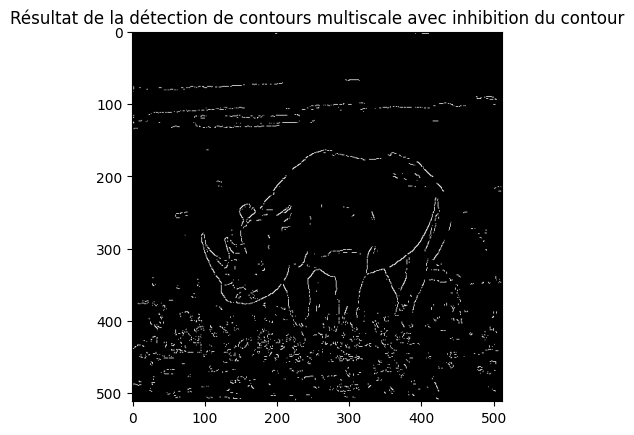

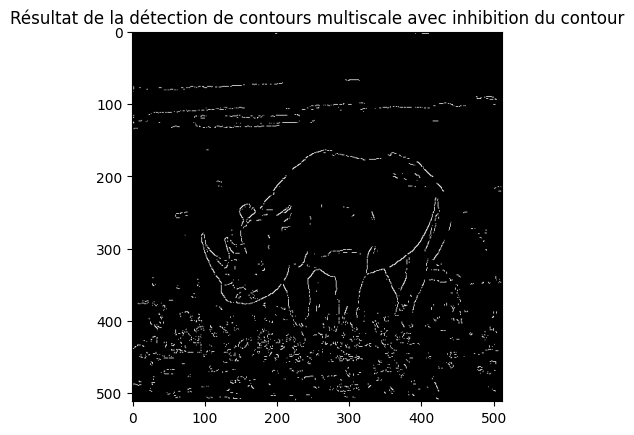

error: Unknown C++ exception from OpenCV code

In [23]:
hog_distance('database/images/rino.pgm','database/images/rino.pgm')